##**IMPORTANDO AS BIBLIOTECAS/MÓDULOS**

* gcsfs -> conexão com o GCP
* pymongo -> Conexão com o MongoDB
* pandas -> manipulação e análise de dados
* pyspark -> framework para processar grandes quantidades de dados
* fsspec -> projeto para fornecer uma interface Python unificada para sistemas de arquivos locais, remotos e incorporados e armazenamento de bytes.
* pandera -> validação de schema

In [ ]:
!pip install gcsfs

In [ ]:
!pip install pymongo 

In [ ]:
!pip install pandas

In [ ]:
!pip install pyspark

In [ ]:
pip install fsspec

In [ ]:
pip install pandera



* psycopg2 -> Adaptador Postgres
* requests -> Solicitações HTTP em Python
* pymongo -> Conexão com o MongoDB
* sqlalchemy -> Mapeamento Objeto Relacional
* datetime -> fornece as classes para manipulação de datas e horas
* csv -> ler e gravar arquivos .csv
* collections -> trabalhar com dados de maneira eficiente
* numpy -> processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes
* pandera -> validação do schema


In [8]:
import psycopg2
import requests
import pymongo
import sqlalchemy
import datetime
import csv
import collections
import numpy as np
import pandera as pa

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


* Pandas -> análise e manipulação de dados
* os -> automação de processos em Python
* storage -> armazenamento em nuvem

In [85]:
import pandas as pd
import pyspark.sql.functions as F
from google.cloud import storage
import pyspark.sql.functions as F

In [86]:
import os

In [11]:
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql.functions import isnull, isnan, when, count, col
from pyspark.sql.functions import *
from pyspark.sql.functions import ceil, col

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**CONEXÃO GCP**

INCLUINDO A CHAVE DE SEGURANÇA DO GCP

In [13]:
serviceAccount = r'/content/drive/MyDrive/projeto-final-the-last-dance-8b51b88868a6.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

ACESSANDO O BUCKET

In [14]:
acesso = storage.Client()

bucket = acesso.get_bucket('projeto-final')

CRIANDO O DATAFRAME


In [15]:
bucket.blob('equipe4.csv')

<Blob: projeto-final, equipe4.csv, None>

In [16]:
path = 'gs://projeto-final/arq-original/equipe4.csv'

##**NORMALIZAÇÃO E TRATAMENTO COM PYSPARK**

CONEXÃO COM A SPARKSESSION

In [17]:
spark = ( SparkSession.builder
                        .master("local")
                        .appName("projeto-final")
                        .config("spark.ui.port", "4050")
                        .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-latest.jar')
                        .getOrCreate() 
        )

In [18]:
spark

CRIANDO OS DATAFRAMES QUE SERÃO UTILIZADOS NO PROCESSO DE ETL
* spark_2020 -> df criado com o dataset solicitado para o projeto final
* df_cid1 -> df criado para substituir os numeros do CID informado na declaração de óbito pelo nome
* df_uf1 -> df criado para substituir o numero da uf informado no df principal, pelo nome do estado.

In [19]:
spark_2020 = ( spark.read.format('csv')
                       .option('delimiter', ';')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('gs://projeto-final/arq-original/equipe4.csv')
)

In [20]:
df_cid1 = ( spark.read.format("csv")
                  .option("header", "true")
                  .option("inferschema", "true")
                  .option("delimiter", ",")
                  .load('gs://projeto-final/arq-original/cid10.csv')
)

In [21]:
df_uf1 = ( spark.read.format("csv")
                  .option("header", "true")
                  .option("inferschema", "true")
                  .option("delimiter", ",")
                  .load('gs://projeto-final/arq-original/Arquivos auxiliares/UF-Munic.csv')
)

PRÉ-ANALISE DOS DADOS -> DF SPARK_2020

In [22]:
spark_2020.count()

1581645

In [23]:
spark_2020.dtypes

[('contador', 'int'),
 ('ORIGEM', 'int'),
 ('TIPOBITO', 'int'),
 ('DTOBITO', 'int'),
 ('HORAOBITO', 'int'),
 ('NATURAL', 'int'),
 ('CODMUNNATU', 'int'),
 ('DTNASC', 'int'),
 ('IDADE', 'int'),
 ('SEXO', 'int'),
 ('RACACOR', 'int'),
 ('ESTCIV', 'int'),
 ('ESC', 'int'),
 ('ESC2010', 'int'),
 ('SERIESCFAL', 'int'),
 ('OCUP', 'int'),
 ('CODMUNRES', 'int'),
 ('LOCOCOR', 'int'),
 ('CODESTAB', 'int'),
 ('CODMUNOCOR', 'int'),
 ('IDADEMAE', 'int'),
 ('ESCMAE', 'int'),
 ('ESCMAE2010', 'int'),
 ('SERIESCMAE', 'int'),
 ('OCUPMAE', 'int'),
 ('QTDFILVIVO', 'int'),
 ('QTDFILMORT', 'int'),
 ('GRAVIDEZ', 'int'),
 ('SEMAGESTAC', 'int'),
 ('GESTACAO', 'int'),
 ('PARTO', 'int'),
 ('OBITOPARTO', 'int'),
 ('PESO', 'int'),
 ('TPMORTEOCO', 'int'),
 ('OBITOGRAV', 'int'),
 ('OBITOPUERP', 'int'),
 ('ASSISTMED', 'int'),
 ('EXAME', 'int'),
 ('CIRURGIA', 'int'),
 ('NECROPSIA', 'int'),
 ('LINHAA', 'string'),
 ('LINHAB', 'string'),
 ('LINHAC', 'string'),
 ('LINHAD', 'string'),
 ('LINHAII', 'string'),
 ('CAUSABAS', 'st

In [24]:
spark_2020.show(1)

+--------+------+--------+--------+---------+-------+----------+--------+-----+----+-------+------+---+-------+----------+------+---------+-------+--------+----------+--------+------+----------+----------+-------+----------+----------+--------+----------+--------+-----+----------+----+----------+---------+----------+---------+-----+--------+---------+------+------+------+------+-------+--------+------+----------+----------+---------+--------+-----+----------+----------+----------+---------+----------+----------+----------+---------+--------+---------+--------+----------+-------+--------+----------+----------+----------+--------+-------+----------+--------+----------+--------+------+----------+----------+--------+----------+---------+--------+----------+-----+---------+------+
|contador|ORIGEM|TIPOBITO| DTOBITO|HORAOBITO|NATURAL|CODMUNNATU|  DTNASC|IDADE|SEXO|RACACOR|ESTCIV|ESC|ESC2010|SERIESCFAL|  OCUP|CODMUNRES|LOCOCOR|CODESTAB|CODMUNOCOR|IDADEMAE|ESCMAE|ESCMAE2010|SERIESCMAE|OCUPMAE|

In [25]:
#CONTANDO OS CAMPOS "NULL" DE CADA COLUNA DO DF
spark_2020.select([count(when(isnull(c), c)).alias(c) for c in spark_2020.columns]).show()

+--------+------+--------+-------+---------+-------+----------+------+-----+----+-------+------+------+-------+----------+------+---------+-------+--------+----------+--------+-------+----------+----------+-------+----------+----------+--------+----------+--------+-------+----------+-------+----------+---------+----------+---------+-------+--------+---------+------+------+------+-------+-------+--------+-------+----------+----------+---------+--------+-------+----------+----------+----------+---------+----------+----------+----------+---------+--------+---------+--------+----------+-------+--------+----------+----------+----------+--------+-------+----------+--------+----------+--------+-------+----------+----------+--------+----------+---------+--------+----------+------+---------+-------+
|contador|ORIGEM|TIPOBITO|DTOBITO|HORAOBITO|NATURAL|CODMUNNATU|DTNASC|IDADE|SEXO|RACACOR|ESTCIV|   ESC|ESC2010|SERIESCFAL|  OCUP|CODMUNRES|LOCOCOR|CODESTAB|CODMUNOCOR|IDADEMAE| ESCMAE|ESCMAE2010|SER

DROPANDO COLUNAS QUE NÃO SERÃO UTILIZADAS


In [26]:
spark_2020 = spark_2020.drop(*('ORIGEM','HORAOBITO','ESTCIV','ESC','ESC2010','SERIESCFAL','CODMUNRES','IDADEMAE','ESCMAE','ESCMAE2010','SERIESCMAE','OCUPMAE','QTDFILMORT','GRAVIDEZ','SEMAGESTAC','GESTACAO','PARTO','OBITOPARTO','PESO','TPMORTEOCO','ASSISTMED','EXAME','CIRURGIA','NECROPSIA','CB_PRE','COMUNSVOIM','DTATESTADO','ACIDTRAB','NUMEROLOTE','DTINVESTIG','DTCADASTRO','ATESTANTE','STCODIFICA','CODIFICADO','VERSAOSIST','VERSAOSCB','FONTEINV','DTRECEBIM','ATESTADO','DTRECORIGA','CAUSAMAT','ESCMAEAGR1','ESCFALAGR1','DTCADINV','DTCONINV','FONTES','TPRESGINFO','TPNIVELINV','DTCADINF','MORTEPARTO','DTCONCASO','ALTCAUSA','TPPOS','TP_ALTERA','CB_ALT','CIRCOBITO','FONTE','NUDIASOBCO','TPOBITOCOR','QTDFILVIVO','OBITOGRAV','OBITOPUERP','LINHAA','LINHAB','LINHAC','LINHAD','LINHAII','IDADE','OPOR_DO','NATURAL','CODMUNNATU','OPOR_DO','DIFDATA'))

In [27]:
spark_2020.show(5)

+--------+--------+--------+--------+----+-------+------+-------+--------+----------+--------+----------+--------+----------+
|contador|TIPOBITO| DTOBITO|  DTNASC|SEXO|RACACOR|  OCUP|LOCOCOR|CODESTAB|CODMUNOCOR|CAUSABAS|STDOEPIDEM|STDONOVA|CAUSABAS_O|
+--------+--------+--------+--------+----+-------+------+-------+--------+----------+--------+----------+--------+----------+
|       1|       2|25012020|10051951|   1|      1|999993|      3|    null|    316930|     R99|         0|       1|       R99|
|       2|       2|25012020|16031966|   1|      2|621005|      3|    null|    316930|     R99|         0|       1|       R99|
|       3|       2|14012020|10071937|   2|      1|999992|      1| 2760657|    316930|    K579|         0|       1|      K579|
|       4|       2|20012020| 2111946|   2|      1|999992|      1| 2760657|    316930|    J960|         0|       1|      J960|
|       5|       2|26012020|12091959|   1|      1|231205|      1| 2760657|    316930|    A419|         0|       1|    

COMANDO PARA RENOMEAR COLUNAS

In [28]:
spark_2020 = spark_2020.withColumnRenamed("contador", "SEQUENCIA").withColumnRenamed("TIPOBITO", "TIPO_OBITO").withColumnRenamed("DTOBITO", "DATA_OBITO").withColumnRenamed("CODMUNNATU", "CIDADE_NASC").withColumnRenamed("RACACOR", "RACA_COR").withColumnRenamed("OCUP", "OCUPACAO").withColumnRenamed("LOCOCOR", "LOCAL_OCORRENCIA").withColumnRenamed("CODESTAB", "COD_ESTABELECIMENTO").withColumnRenamed("CODMUNOCOR", "CIDADE_OBITO").withColumnRenamed("CAUSABAS", "CAUSA_OBITO").withColumnRenamed("STDOEPIDEM", "STATUS_D_OEPIDEM").withColumnRenamed("STDONOVA", "STATUS_D_O_NOVA").withColumnRenamed("CAUSABAS_O", "CAUSA_OBITO_1")

In [29]:
df_cid1 = df_cid1.withColumnRenamed("codigo","CAUSA_OBITO")

In [30]:
spark_2020.show(5)

+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+-----------+----------------+---------------+-------------+
|SEQUENCIA|TIPO_OBITO|DATA_OBITO|  DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|CAUSA_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|
+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+-----------+----------------+---------------+-------------+
|        1|         2|  25012020|10051951|   1|       1|  999993|               3|               null|      316930|        R99|               0|              1|          R99|
|        2|         2|  25012020|16031966|   1|       2|  621005|               3|               null|      316930|        R99|               0|              1|          R99|
|        3|         2|  14012020|10071937|   2|       1|  999992|               1|            2760657|      316930|       K57

In [31]:
#CONTANDO OS CAMPOS "NULL" DE CADA COLUNA DO DF
spark_2020.select([count(when(isnull(c), c)).alias(c) for c in spark_2020.columns]).show()

+---------+----------+----------+------+----+--------+--------+----------------+-------------------+------------+-----------+----------------+---------------+-------------+
|SEQUENCIA|TIPO_OBITO|DATA_OBITO|DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|CAUSA_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|
+---------+----------+----------+------+----+--------+--------+----------------+-------------------+------------+-----------+----------------+---------------+-------------+
|        0|         0|         0| 32732|   0|   70020|  280813|               0|             424509|           0|          0|               4|              0|         3895|
+---------+----------+----------+------+----+--------+--------+----------------+-------------------+------------+-----------+----------------+---------------+-------------+



In [32]:
#JOIN DE DATAFRAMES
df_inner_2020 = spark_2020.join(df_cid1, on=['CAUSA_OBITO'], how='left')

In [33]:
df_inner_2020.show(5)

+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|  DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|                nome|
+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+
|        R99|        1|         2|  25012020|10051951|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|
|        R99|        2|         2|  25012020|16031966|   1|       2|  621005|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|
|       K579|       

In [34]:
#RENOMEANDO COLUNA RECEM CRIADA
df_inner_2020 = df_inner_2020.withColumnRenamed("nome","DESCRICAO_OBITO")

In [35]:
#VERIFICANDO QUANTAS COLUNAS TEM O DF
print(len(df_inner_2020.columns))

15


In [36]:
#CRIAÇÃO DE COLUNA PARA CONTAGEM DOS OBITOS
df_inner_2020 = df_inner_2020.withColumn('QTD_OBITO',F.lit(1))

In [37]:
#FAZENDO BACKUP DO DF
df2020 = df_inner_2020

In [38]:
df2020.show(5)

+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|  DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|     DESCRICAO_OBITO|QTD_OBITO|
+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|        R99|        1|         2|  25012020|10051951|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|        1|
|        R99|        2|         2|  25012020|16031966|   1|       2|  621005|               3|               null|      316930|               0|              1|          R99|Ou

REALIZANDO O TRATAMENTO DAS DATAS

In [39]:
df2020 = df2020.withColumn('DATA_OBITO', lpad(df2020.DATA_OBITO,8, '0')).withColumn('DTNASC', lpad(df2020.DTNASC,8, '0'))
                    

In [40]:
df2020.show(5)

+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|  DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|     DESCRICAO_OBITO|QTD_OBITO|
+-----------+---------+----------+----------+--------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|        R99|        1|         2|  25012020|10051951|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|        1|
|        R99|        2|         2|  25012020|16031966|   1|       2|  621005|               3|               null|      316930|               0|              1|          R99|Ou

In [41]:
df2020 = df2020.withColumn("DATA_OBITO", F.to_date(F.col("DATA_OBITO").cast("string"), 'ddMMyyyy')).withColumn("DTNASC", F.to_date(F.col("DTNASC").cast("string"), 'ddMMyyyy'))

In [42]:
df2020.show(5)

+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|    DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|     DESCRICAO_OBITO|QTD_OBITO|
+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+
|        R99|        1|         2|2020-01-25|1951-05-10|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|        1|
|        R99|        2|         2|2020-01-25|1966-03-16|   1|       2|  621005|               3|               null|      316930|               0|              1|      

CALCULANDO A IDADE EM QUE OCORRERAM OS OBITOS

In [43]:
#MONTHS_BETWEEN() - RETORNA A DIFERENÇA ENTRE DUAS DATAS EM MESES
from pyspark.sql.functions import *
df2020.select(F.col('DTNASC'), F.col('DATA_OBITO'), F.months_between(F.col('DATA_OBITO'), F.col('DTNASC')).alias('IDADE')).show()

+----------+----------+-------------+
|    DTNASC|DATA_OBITO|        IDADE|
+----------+----------+-------------+
|1951-05-10|2020-01-25| 824.48387097|
|1966-03-16|2020-01-25| 646.29032258|
|1937-07-10|2020-01-14| 990.12903226|
|1946-11-02|2020-01-20| 878.58064516|
|1959-09-12|2020-01-26|  724.4516129|
|1964-05-08|2020-01-27| 668.61290323|
|1973-03-17|2020-01-12| 561.83870968|
|1974-06-15|2020-01-11| 546.87096774|
|1943-05-10|2020-01-11| 920.03225806|
|2020-01-13|2020-01-15|   0.06451613|
|1934-09-09|2020-01-12|1024.09677419|
|1961-04-24|2020-01-10|  704.5483871|
|1950-08-28|2020-01-28|        833.0|
|1949-08-10|2020-01-28| 845.58064516|
|1946-10-26|2020-01-16| 878.67741935|
|1944-03-19|2020-01-04| 909.51612903|
|1924-03-09|2020-01-14|1150.16129032|
|1948-08-01|2020-01-17| 857.51612903|
|1944-10-21|2020-01-22| 903.03225806|
|1981-08-12|2020-01-22| 461.32258065|
+----------+----------+-------------+
only showing top 20 rows



In [44]:
df2020 = df2020.withColumn('IDADE', F.months_between(F.col('DATA_OBITO'), F.col('DTNASC')))

In [45]:
from pyspark.sql.functions import ceil, col
df2020 = df2020.select("*",ceil("IDADE"))

In [46]:
df2020 = df2020.withColumn('IDADE_COMPLETA',((col('CEIL(IDADE)') / 12)))

In [47]:
from pyspark.sql.functions import ceil, col
df2020 = df2020.select("*",ceil("IDADE_COMPLETA"))

In [48]:
df2020 = df2020.drop('IDADE')

In [49]:
df2020 = df2020.drop('CEIL(IDADE)')

In [50]:
df2020 = df2020.drop('IDADE_COMPLETA')

In [51]:
#COMANDO PARA RENOMEAR COLUNAS
df2020 = df2020.withColumnRenamed("CEIL(IDADE_COMPLETA)", "IDADE_OBITO")

In [52]:
df2020.show(5)

+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+-----------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|    DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|     DESCRICAO_OBITO|QTD_OBITO|IDADE_OBITO|
+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+-----------+
|        R99|        1|         2|2020-01-25|1951-05-10|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|        1|         69|
|        R99|        2|         2|2020-01-25|1966-03-16|   1|       2|  621005|               3|               null|    

INFORMANDO OS ESTADOS EM QUE OCORRERAM OS OBITOS

Estas informações foram obtidas no dataset uf1

In [53]:
df2020 = df2020.withColumn('ESTADO_DA_OCORRENCIA', F.when((F.col('CIDADE_OBITO') > 310000) & (F.col('CIDADE_OBITO') < 319999), F.lit('Minas Gerais'))
                                              .when((F.col('CIDADE_OBITO') > 110000) & (F.col('CIDADE_OBITO') < 119999), F.lit('Rondônia'))
                                              .when((F.col('CIDADE_OBITO') > 120000) & (F.col('CIDADE_OBITO') < 129999), F.lit('Acre'))
                                              .when((F.col('CIDADE_OBITO') > 130000) & (F.col('CIDADE_OBITO') < 139999), F.lit('Amazonia'))
                                              .when((F.col('CIDADE_OBITO') > 140000) & (F.col('CIDADE_OBITO') < 149999), F.lit('Roraiama'))
                                              .when((F.col('CIDADE_OBITO') > 150000) & (F.col('CIDADE_OBITO') < 159999), F.lit('Pará'))
                                              .when((F.col('CIDADE_OBITO') > 160000) & (F.col('CIDADE_OBITO') < 169999), F.lit('Amapá'))
                                              .when((F.col('CIDADE_OBITO') > 170000) & (F.col('CIDADE_OBITO') < 179999), F.lit('Tocantins'))
                                              .when((F.col('CIDADE_OBITO') > 210000) & (F.col('CIDADE_OBITO') < 219999), F.lit('Maranhão'))
                                              .when((F.col('CIDADE_OBITO') > 220000) & (F.col('CIDADE_OBITO') < 229999), F.lit('Piauí'))
                                              .when((F.col('CIDADE_OBITO') > 230000) & (F.col('CIDADE_OBITO') < 239999), F.lit('Ceará'))
                                              .when((F.col('CIDADE_OBITO') > 240000) & (F.col('CIDADE_OBITO') < 249999), F.lit('Rio Grande do Norte'))
                                              .when((F.col('CIDADE_OBITO') > 250000) & (F.col('CIDADE_OBITO') < 259999), F.lit('Paraíba'))
                                              .when((F.col('CIDADE_OBITO') > 260000) & (F.col('CIDADE_OBITO') < 269999), F.lit('Pernambuco'))
                                              .when((F.col('CIDADE_OBITO') > 270000) & (F.col('CIDADE_OBITO') < 279999), F.lit('Alagoas'))
                                              .when((F.col('CIDADE_OBITO') > 280000) & (F.col('CIDADE_OBITO') < 289999), F.lit('Sergipe'))
                                              .when((F.col('CIDADE_OBITO') > 290000) & (F.col('CIDADE_OBITO') < 299999), F.lit('Bahia'))
                                              .when((F.col('CIDADE_OBITO') > 320000) & (F.col('CIDADE_OBITO') < 329999), F.lit('Espirito Santo'))
                                              .when((F.col('CIDADE_OBITO') > 330000) & (F.col('CIDADE_OBITO') < 339999), F.lit('Rio de Janeiro'))
                                              .when((F.col('CIDADE_OBITO') > 350000) & (F.col('CIDADE_OBITO') < 359999), F.lit('São Paulo'))
                                              .when((F.col('CIDADE_OBITO') > 410000) & (F.col('CIDADE_OBITO') < 419999), F.lit('Paraná'))
                                              .when((F.col('CIDADE_OBITO') > 420000) & (F.col('CIDADE_OBITO') < 429999), F.lit('Santa Catarina'))
                                              .when((F.col('CIDADE_OBITO') > 430000) & (F.col('CIDADE_OBITO') < 439999), F.lit('Rio Grande do Sul'))
                                              .when((F.col('CIDADE_OBITO') > 500000) & (F.col('CIDADE_OBITO') < 509999), F.lit('Mato Grosso do Sul'))
                                              .when((F.col('CIDADE_OBITO') > 510000) & (F.col('CIDADE_OBITO') < 519999), F.lit('Mato Grosso'))
                                              .when((F.col('CIDADE_OBITO') > 520000) & (F.col('CIDADE_OBITO') < 529999), F.lit('Goiás'))
                                              .when((F.col('CIDADE_OBITO') > 530000) & (F.col('CIDADE_OBITO') < 539999), F.lit('DF'))
                                              .otherwise(F.lit('Não Informado'))) 

In [54]:
df2020.show(20)

+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+-----------+--------------------+
|CAUSA_OBITO|SEQUENCIA|TIPO_OBITO|DATA_OBITO|    DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|CAUSA_OBITO_1|     DESCRICAO_OBITO|QTD_OBITO|IDADE_OBITO|ESTADO_DA_OCORRENCIA|
+-----------+---------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+-------------+--------------------+---------+-----------+--------------------+
|        R99|        1|         2|2020-01-25|1951-05-10|   1|       1|  999993|               3|               null|      316930|               0|              1|          R99|Outras Causas Mal...|        1|         69|        Minas Gerais|
|        R99|        2|         2|20

RENOMEANDO INFORMAÇÕES DAS COLUNAS RACA_COR, LOCAL_OCORRENCIA E SEXO

In [55]:
df2020 = df2020.withColumn('RACA_COR', F.regexp_replace('RACA_COR','1','Branca')).withColumn('RACA_COR', F.regexp_replace('RACA_COR','2','Preta')).withColumn('RACA_COR', F.regexp_replace('RACA_COR','3','Amarela')).withColumn('RACA_COR', F.regexp_replace('RACA_COR','4','Parda')).withColumn('RACA_COR', F.regexp_replace('RACA_COR','5','Indigena'))

In [56]:
df2020 = df2020.withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','1','Hospital')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','2','Outros estabelecimentos de saúde')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','3','Domicílio')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','4','Via pública')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','5','Outros')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','6','Aldeia indígena')).withColumn('LOCAL_OCORRENCIA', F.regexp_replace('LOCAL_OCORRENCIA','9','Ignorado'))

In [57]:
df2020 = df2020.withColumn('SEXO', F.regexp_replace('SEXO','0','N/I')).withColumn('SEXO', F.regexp_replace('SEXO','1','Masc')).withColumn('SEXO', F.regexp_replace('SEXO','2','Fem'))

In [58]:
df2020 = df2020.drop('SEQUENCIA','CAUSA_OBITO_1')

In [59]:
df2020.show(5)

+-----------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+--------------------+---------+-----------+--------------------+
|CAUSA_OBITO|TIPO_OBITO|DATA_OBITO|    DTNASC|SEXO|RACA_COR|OCUPACAO|LOCAL_OCORRENCIA|COD_ESTABELECIMENTO|CIDADE_OBITO|STATUS_D_OEPIDEM|STATUS_D_O_NOVA|     DESCRICAO_OBITO|QTD_OBITO|IDADE_OBITO|ESTADO_DA_OCORRENCIA|
+-----------+----------+----------+----------+----+--------+--------+----------------+-------------------+------------+----------------+---------------+--------------------+---------+-----------+--------------------+
|        R99|         2|2020-01-25|1951-05-10|Masc|  Branca|  999993|       Domicílio|               null|      316930|               0|              1|Outras Causas Mal...|        1|         69|        Minas Gerais|
|        R99|         2|2020-01-25|1966-03-16|Masc|   Preta|  621005|       Domicílio|               null|      316930|             

In [60]:
df2020.select('SEXO').distinct().collect()

[Row(SEXO='Fem'), Row(SEXO='N/I'), Row(SEXO='Masc')]

In [61]:
print(len(df2020.columns))

16


Inclusão de coluna por:
* Jovens - Indivíduos de até 19 anos;
* Adultos - Indivíduos com idade entre 20 até 59 anos;
* Idosos - Indivíduos de 60 anos em diante.

In [62]:
df2020 = (df2020.withColumn('IDADE', F.when((F.col('IDADE_OBITO') <= 19), F.lit('Jovem'))
                             .when((F.col('IDADE_OBITO') > 19) & (F.col('IDADE_OBITO') <= 59), F.lit('Adulto'))
                             .when((F.col('IDADE_OBITO') > 59), F.lit('Idoso')))
)

CONSULTAS VIA SPARKSQL

In [88]:
df2020.select("LOCAL_OCORRENCIA","RACA_COR","IDADE","SEXO").show()

+----------------+--------+------+----+
|LOCAL_OCORRENCIA|RACA_COR| IDADE|SEXO|
+----------------+--------+------+----+
|       Domicílio|  Branca| Idoso|Masc|
|       Domicílio|   Preta|Adulto|Masc|
|        Hospital|  Branca| Idoso| Fem|
|        Hospital|  Branca| Idoso| Fem|
|        Hospital|  Branca| Idoso|Masc|
|        Hospital|   Parda|Adulto|Masc|
|       Domicílio|   Parda|Adulto| Fem|
|     Via pública|  Branca|Adulto|Masc|
|        Hospital|   Preta| Idoso|Masc|
|        Hospital|   Parda| Jovem|Masc|
|        Hospital|  Branca| Idoso|Masc|
|        Hospital|   Preta|Adulto| Fem|
|        Hospital|  Branca| Idoso| Fem|
|        Hospital|   Preta| Idoso| Fem|
|        Hospital|   Parda| Idoso| Fem|
|       Domicílio|   Parda| Idoso| Fem|
|       Domicílio|  Branca| Idoso|Masc|
|        Hospital|   Parda| Idoso|Masc|
|        Hospital|   Parda| Idoso|Masc|
|        Hospital|   Parda|Adulto|Masc|
+----------------+--------+------+----+
only showing top 20 rows



In [90]:
df2020.select(F.col("SEXO"),F.col("IDADE"),F.col("LOCAL_OCORRENCIA"),F.col("DESCRICAO_OBITO")).show(10)

+----+------+----------------+--------------------+
|SEXO| IDADE|LOCAL_OCORRENCIA|     DESCRICAO_OBITO|
+----+------+----------------+--------------------+
|Masc| Idoso|       Domicílio|Outras Causas Mal...|
|Masc|Adulto|       Domicílio|Outras Causas Mal...|
| Fem| Idoso|        Hospital|Doença Diverticul...|
| Fem| Idoso|        Hospital|Insuficiência Res...|
|Masc| Idoso|        Hospital|Septicemia Não Es...|
|Masc|Adulto|        Hospital|Insuficiência Res...|
| Fem|Adulto|       Domicílio|Neoplasia Maligna...|
|Masc|Adulto|     Via pública|Outras Causas Mal...|
|Masc| Idoso|        Hospital|Bradicardia Não E...|
|Masc| Jovem|        Hospital|Septicemia Bacter...|
+----+------+----------------+--------------------+
only showing top 10 rows



In [92]:
df2020.select(F.col("IDADE"),F.col("ESTADO_DA_OCORRENCIA"),F.col("LOCAL_OCORRENCIA")).filter(F.col("RACA_COR") == "Preta").show()

+------+--------------------+----------------+
| IDADE|ESTADO_DA_OCORRENCIA|LOCAL_OCORRENCIA|
+------+--------------------+----------------+
|Adulto|        Minas Gerais|       Domicílio|
| Idoso|        Minas Gerais|        Hospital|
|Adulto|        Minas Gerais|        Hospital|
| Idoso|        Minas Gerais|        Hospital|
| Idoso|            Maranhão|     Via pública|
|Adulto|           São Paulo|     Via pública|
| Idoso|           São Paulo|        Hospital|
| Idoso|               Bahia|        Hospital|
|Adulto|               Bahia|        Hospital|
|Adulto| Rio Grande do Norte|        Hospital|
| Idoso| Rio Grande do Norte|        Hospital|
| Idoso|   Rio Grande do Sul|        Hospital|
| Idoso|        Minas Gerais|        Hospital|
| Idoso|        Minas Gerais|        Hospital|
| Idoso|            Maranhão|          Outros|
| Idoso|           São Paulo|        Hospital|
| Idoso|            Maranhão|        Hospital|
| Idoso|             Sergipe|        Hospital|
|Adulto|     

In [94]:
filtro = F.col("ESTADO_DA_OCORRENCIA") == "São Paulo"
df2020.select(F.col("RACA_COR"), F.col("SEXO"), F.col("DESCRICAO_OBITO")).filter(filtro).show()

+--------+----+--------------------+
|RACA_COR|SEXO|     DESCRICAO_OBITO|
+--------+----+--------------------+
|   Parda| Fem|Septicemia Bacter...|
|    null|Masc|Morte Fetal de Ca...|
|   Preta| Fem|Outras Causas Mal...|
|    null| Fem|Hipóxia Intra-ute...|
|    null|Masc|Feto e Recém-nasc...|
|    null|Masc|Hipóxia Intra-ute...|
|  Branca|Masc|Outras Causas Mal...|
|  Branca|Masc|Neoplasia Maligna...|
|   Preta|Masc|Insuficiência Car...|
|   Parda|Masc|Outras Causas Mal...|
|  Branca|Masc|Outras Septicemia...|
|   Parda|Masc|Doença de Hodgkin...|
|   Parda|Masc|Neoplasia Maligna...|
|   Parda|Masc|Acidente Vascular...|
|  Branca|Masc|Leucemia Não Espe...|
|  Branca|Masc|Neoplasia Maligna...|
|  Branca| Fem|Broncopneumonia N...|
|  Branca| Fem|Acidente Vascular...|
|  Branca| Fem|Doença de Alzheim...|
|  Branca| Fem|Doença de Alzheim...|
+--------+----+--------------------+
only showing top 20 rows



##**NORMALIZAÇÃO E TRATAMENTO COM PANDAS**

Convertendo df spark para pandas

In [63]:
df_pandas = df2020.toPandas()

In [64]:
df_pandas.head(1)

,CAUSA_OBITO,TIPO_OBITO,DATA_OBITO,DTNASC,SEXO,RACA_COR,OCUPACAO,LOCAL_OCORRENCIA,COD_ESTABELECIMENTO,CIDADE_OBITO,STATUS_D_OEPIDEM,STATUS_D_O_NOVA,DESCRICAO_OBITO,QTD_OBITO,IDADE_OBITO,ESTADO_DA_OCORRENCIA,IDADE
0,R99,2,2020-01-25,1951-05-10,Masc,Branca,999993.0,Domicílio,NaN,316930,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,69.0,Minas Gerais,Idoso


In [65]:
df_pandas.isnull().sum()

CAUSA_OBITO                  0
TIPO_OBITO                   0
DATA_OBITO                   0
DTNASC                   32732
SEXO                         0
RACA_COR                 70020
OCUPACAO                280813
LOCAL_OCORRENCIA             0
COD_ESTABELECIMENTO     424509
CIDADE_OBITO                 0
STATUS_D_OEPIDEM             4
STATUS_D_O_NOVA              0
DESCRICAO_OBITO             84
QTD_OBITO                    0
IDADE_OBITO              32732
ESTADO_DA_OCORRENCIA         0
IDADE                    32732
dtype: int64

SUBSTITUINDO OS CAMPOS NULL

In [66]:
df_pandas['DTNASC'].fillna(0, inplace=True)
df_pandas['RACA_COR'].fillna('Não Informado', inplace=True)
df_pandas['OCUPACAO'].fillna(0, inplace=True)
df_pandas['COD_ESTABELECIMENTO'].fillna(0, inplace=True)
df_pandas['STATUS_D_OEPIDEM'].fillna('Não Informado', inplace=True)
df_pandas['DESCRICAO_OBITO'].fillna('Não Informado', inplace=True)
df_pandas['IDADE_OBITO'].fillna(0, inplace=True)

In [67]:
df_pandas.dtypes

CAUSA_OBITO              object
TIPO_OBITO                int32
DATA_OBITO               object
DTNASC                   object
SEXO                     object
RACA_COR                 object
OCUPACAO                float64
LOCAL_OCORRENCIA         object
COD_ESTABELECIMENTO     float64
CIDADE_OBITO              int32
STATUS_D_OEPIDEM         object
STATUS_D_O_NOVA           int32
DESCRICAO_OBITO          object
QTD_OBITO                 int32
IDADE_OBITO             float64
ESTADO_DA_OCORRENCIA     object
IDADE                    object
dtype: object

In [68]:
df_pandas.head(1)

,CAUSA_OBITO,TIPO_OBITO,DATA_OBITO,DTNASC,SEXO,RACA_COR,OCUPACAO,LOCAL_OCORRENCIA,COD_ESTABELECIMENTO,CIDADE_OBITO,STATUS_D_OEPIDEM,STATUS_D_O_NOVA,DESCRICAO_OBITO,QTD_OBITO,IDADE_OBITO,ESTADO_DA_OCORRENCIA,IDADE
0,R99,2,2020-01-25,1951-05-10,Masc,Branca,999993.0,Domicílio,0.0,316930,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,69.0,Minas Gerais,Idoso


CONSTRUÇÃO DO SCHEMA

In [69]:
schema = pa.DataFrameSchema(
    columns = {
        "CAUSA_OBITO":pa.Column(pa.String),
        "TIPO_OBITO":pa.Column(pa.Int32),
        "DATA_OBITO":pa.Column(pa.String),
        "DTNASC":pa.Column(pa.String),
        "SEXO":pa.Column(pa.String),
        "RACA_COR":pa.Column(pa.String),
        "OCUPACAO":pa.Column(pa.Float64),
        "LOCAL_OCORRENCIA":pa.Column(pa.String),
        "COD_ESTABELECIMENTO":pa.Column(pa.Float64),
        "CIDADE_OBITO":pa.Column(pa.Int32),
        "STATUS_D_OEPIDEM":pa.Column(pa.String),
        "STATUS_D_O_NOVA":pa.Column(pa.Int32),
        "DESCRICAO_OBITO":pa.Column(pa.String),
        "QTD_OBITO":pa.Column(pa.Int32),
        "IDADE_OBITO":pa.Column(pa.Float64),
        "ESTADO_DA_OCORRENCIA":pa.Column(pa.String)
            
          }
    
)

CONSTRUÇÃO DOS INSIGHTS PANDAS

In [70]:
df_pandas.dtypes

CAUSA_OBITO              object
TIPO_OBITO                int32
DATA_OBITO               object
DTNASC                   object
SEXO                     object
RACA_COR                 object
OCUPACAO                float64
LOCAL_OCORRENCIA         object
COD_ESTABELECIMENTO     float64
CIDADE_OBITO              int32
STATUS_D_OEPIDEM         object
STATUS_D_O_NOVA           int32
DESCRICAO_OBITO          object
QTD_OBITO                 int32
IDADE_OBITO             float64
ESTADO_DA_OCORRENCIA     object
IDADE                    object
dtype: object

In [71]:
schema.validate(df_pandas)

,CAUSA_OBITO,TIPO_OBITO,DATA_OBITO,DTNASC,SEXO,RACA_COR,OCUPACAO,LOCAL_OCORRENCIA,COD_ESTABELECIMENTO,CIDADE_OBITO,STATUS_D_OEPIDEM,STATUS_D_O_NOVA,DESCRICAO_OBITO,QTD_OBITO,IDADE_OBITO,ESTADO_DA_OCORRENCIA,IDADE
0,R99,2,2020-01-25,1951-05-10,Masc,Branca,999993.0,Domicílio,0.0,316930,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,69.0,Minas Gerais,Idoso
1,R99,2,2020-01-25,1966-03-16,Masc,Preta,621005.0,Domicílio,0.0,316930,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,54.0,Minas Gerais,Adulto
2,K579,2,2020-01-14,1937-07-10,Fem,Branca,999992.0,Hospital,2760657.0,316930,0.0,1,"Doença Diverticular do Intestino, de Localizaç...",1,83.0,Minas Gerais,Idoso
3,J960,2,2020-01-20,1946-11-02,Fem,Branca,999992.0,Hospital,2760657.0,316930,0.0,1,Insuficiência Respiratória Aguda,1,74.0,Minas Gerais,Idoso
4,A419,2,2020-01-26,1959-09-12,Masc,Branca,231205.0,Hospital,2760657.0,316930,0.0,1,Septicemia Não Especificada,1,61.0,Minas Gerais,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581640,C539,2,2020-07-14,1968-10-25,Fem,Indigena,0.0,Domicílio,0.0,130280,0.0,1,"Neoplasia Maligna do Colo do Útero, Não Especi...",1,52.0,Amazonia,Adulto
1581641,R99,2,2020-09-24,2008-05-31,Fem,Indigena,0.0,Aldeia indígena,0.0,150375,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,13.0,Pará,Jovem
1581642,R960,2,2020-07-15,1993-01-16,Fem,Indigena,0.0,Aldeia indígena,0.0,150543,0.0,1,Morte Instantânea,1,28.0,Pará,Adulto
1581643,C189,2,2020-07-13,2001-02-19,Fem,Indigena,0.0,Aldeia indígena,0.0,130390,0.0,1,"Neoplasia Maligna do Cólon, Não Especificado",1,20.0,Amazonia,Adulto


In [72]:
df_pandas.head(1)

,CAUSA_OBITO,TIPO_OBITO,DATA_OBITO,DTNASC,SEXO,RACA_COR,OCUPACAO,LOCAL_OCORRENCIA,COD_ESTABELECIMENTO,CIDADE_OBITO,STATUS_D_OEPIDEM,STATUS_D_O_NOVA,DESCRICAO_OBITO,QTD_OBITO,IDADE_OBITO,ESTADO_DA_OCORRENCIA,IDADE
0,R99,2,2020-01-25,1951-05-10,Masc,Branca,999993.0,Domicílio,0.0,316930,0.0,1,Outras Causas Mal Definidas e as Não Especific...,1,69.0,Minas Gerais,Idoso


In [73]:
df_pandas.groupby(['RACA_COR']).size().sort_values(ascending=False)

RACA_COR
Branca           762577
Parda            602642
Preta            131638
Não Informado     70020
Amarela            9450
Indigena           5318
dtype: int64

In [74]:
df_pandas.groupby(['SEXO']).size().sort_values(ascending=False)

SEXO
Masc    886723
Fem     693401
N/I       1521
dtype: int64

In [75]:
df_pandas.groupby(['IDADE']).size().sort_values(ascending=False)

IDADE
Idoso     1102992
Adulto     392101
Jovem       53820
dtype: int64

In [76]:
df_pandas.groupby(['IDADE','SEXO','RACA_COR','LOCAL_OCORRENCIA','DESCRICAO_OBITO']).size().sort_values(ascending=False).head(10)

IDADE   SEXO  RACA_COR  LOCAL_OCORRENCIA  DESCRICAO_OBITO                                         
Idoso   Masc  Branca    Hospital          Infecção Por Coronavírus de Localização Não Especificada    42784
        Fem   Branca    Hospital          Infecção Por Coronavírus de Localização Não Especificada    34992
        Masc  Parda     Hospital          Infecção Por Coronavírus de Localização Não Especificada    30563
        Fem   Parda     Hospital          Infecção Por Coronavírus de Localização Não Especificada    22411
Adulto  Masc  Parda     Hospital          Infecção Por Coronavírus de Localização Não Especificada    10911
              Branca    Hospital          Infecção Por Coronavírus de Localização Não Especificada    10204
Idoso   Masc  Branca    Hospital          Infarto Agudo do Miocárdio Não Especificado                  9941
        Fem   Branca    Hospital          Pneumonia Não Especificada                                   8391
                                     

In [77]:
df_pandas.groupby(['DESCRICAO_OBITO']).size().sort_values(ascending=False).head(10)

DESCRICAO_OBITO
Infecção Por Coronavírus de Localização Não Especificada                      209720
Infarto Agudo do Miocárdio Não Especificado                                    87008
Outras Causas Mal Definidas e as Não Especificadas de Mortalidade              63772
Pneumonia Não Especificada                                                     37483
Hipertensão Essencial (primária)                                               37129
Acidente Vascular Cerebral, Não Especificado Como Hemorrágico ou Isquêmico     35382
Diabetes Mellitus Não Especificado - Sem Complicações                          32067
Neoplasia Maligna Dos Brônquios ou Pulmões, Não Especificado                   26368
Doença de Alzheimer Não Especificada                                           21798
Infecção do Trato Urinário de Localização Não Especificada                     19963
dtype: int64

##**GRAFICOS**

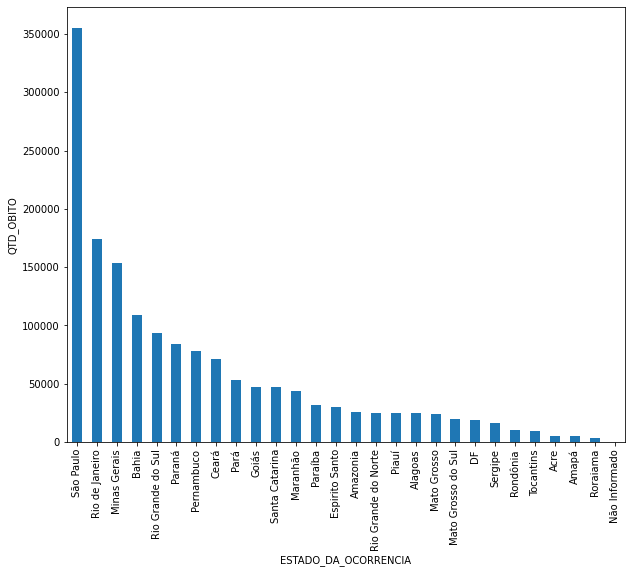

In [78]:
df_pandas.groupby(['ESTADO_DA_OCORRENCIA']).size().sort_values(ascending=False).plot.bar(figsize=(10,8),xlabel = 'ESTADO_DA_OCORRENCIA', ylabel= 'QTD_OBITO')

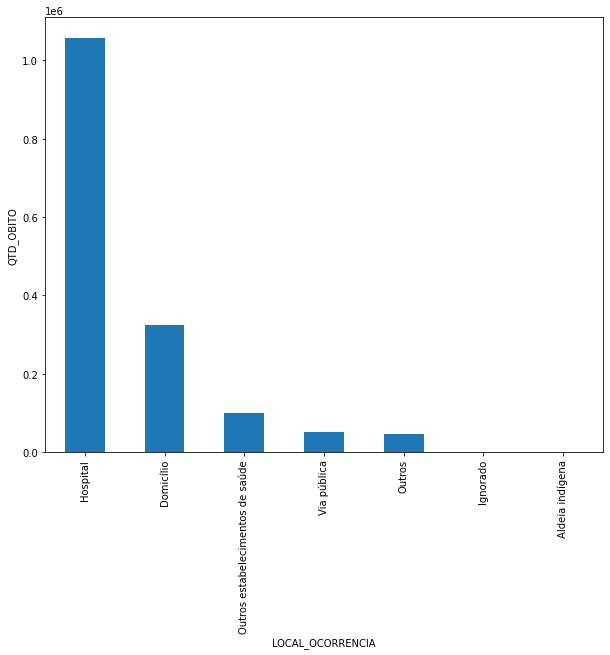

In [79]:
df_pandas.groupby(['LOCAL_OCORRENCIA']).size().sort_values(ascending=False).plot.bar(figsize=(10,8),xlabel = 'LOCAL_OCORRENCIA', ylabel= 'QTD_OBITO')

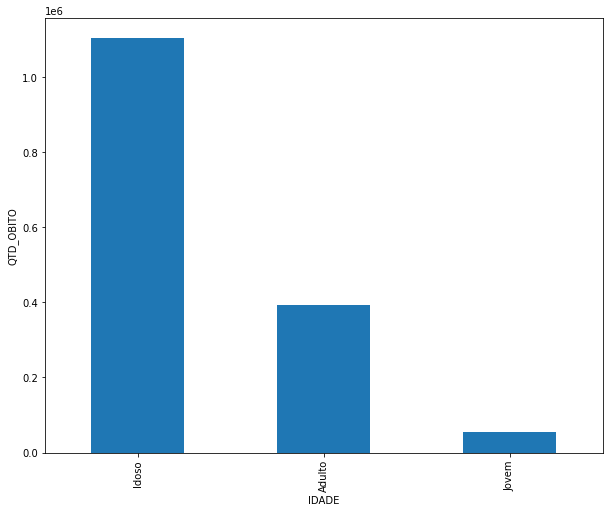

In [84]:
df_pandas.groupby(['IDADE']).size().sort_values(ascending=False).plot.bar(figsize=(10,8),xlabel = 'IDADE', ylabel= 'QTD_OBITO')

##**CONVERTENDO DATAFRAME EM CSV E ENVIANDO PARA O BUCKET**

In [86]:
#df_pandas.to_csv('gs://projeto-final/tratados/df_2020.csv', index=False)